<a href="https://colab.research.google.com/github/eith010/ANN_HW1/blob/main/All_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connect to Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd /gdrive/My Drive/Datasets/

/gdrive/My Drive/Datasets


### Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
import warnings
warnings.filterwarnings('ignore')
tf.get_logger().setLevel('ERROR')

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.7.0


### Set seed for reproducibility

In [4]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Data Exploration 


In [5]:
# Import the dataset
df = pd.read_csv('Training_hw2.csv')
print(df.shape)
df.head()

(68528, 7)


,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
0,7.97698,4.33494,10.67282,1.76692,3.22440,51.681460,3.65434
1,8.07824,4.44616,10.56160,1.70716,3.32566,51.563598,3.47672
2,8.02844,4.22372,10.56160,1.64906,3.17460,50.863080,3.47672
3,8.02844,4.22372,10.56160,1.70716,3.17460,45.841581,3.47672
4,7.87572,4.44616,10.45038,1.70716,3.27586,47.126421,3.47672


In [6]:
# Check the missing values
df.isnull().sum()

Sponginess            0
Wonder level          0
Crunchiness           0
Loudness on impact    0
Meme creativity       0
Soap slipperiness     0
Hype root             0
dtype: int64

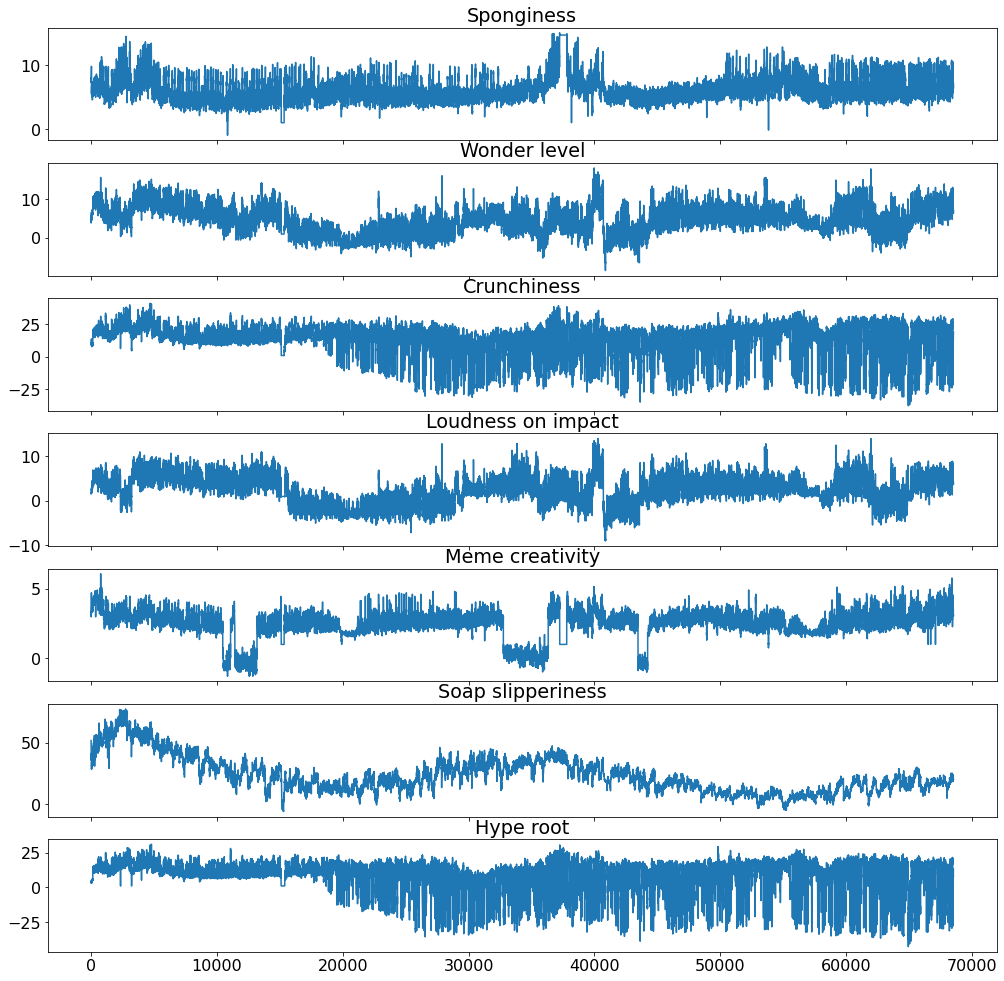

In [7]:
def inspect_dataframe(df, columns):
    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(df[col])
        axs[i].set_title(col)
    plt.show()
inspect_dataframe(df, df.columns)

In [8]:
df.columns

Index(['Sponginess', 'Wonder level', 'Crunchiness', 'Loudness on impact',
       'Meme creativity', 'Soap slipperiness', 'Hype root'],
      dtype='object')

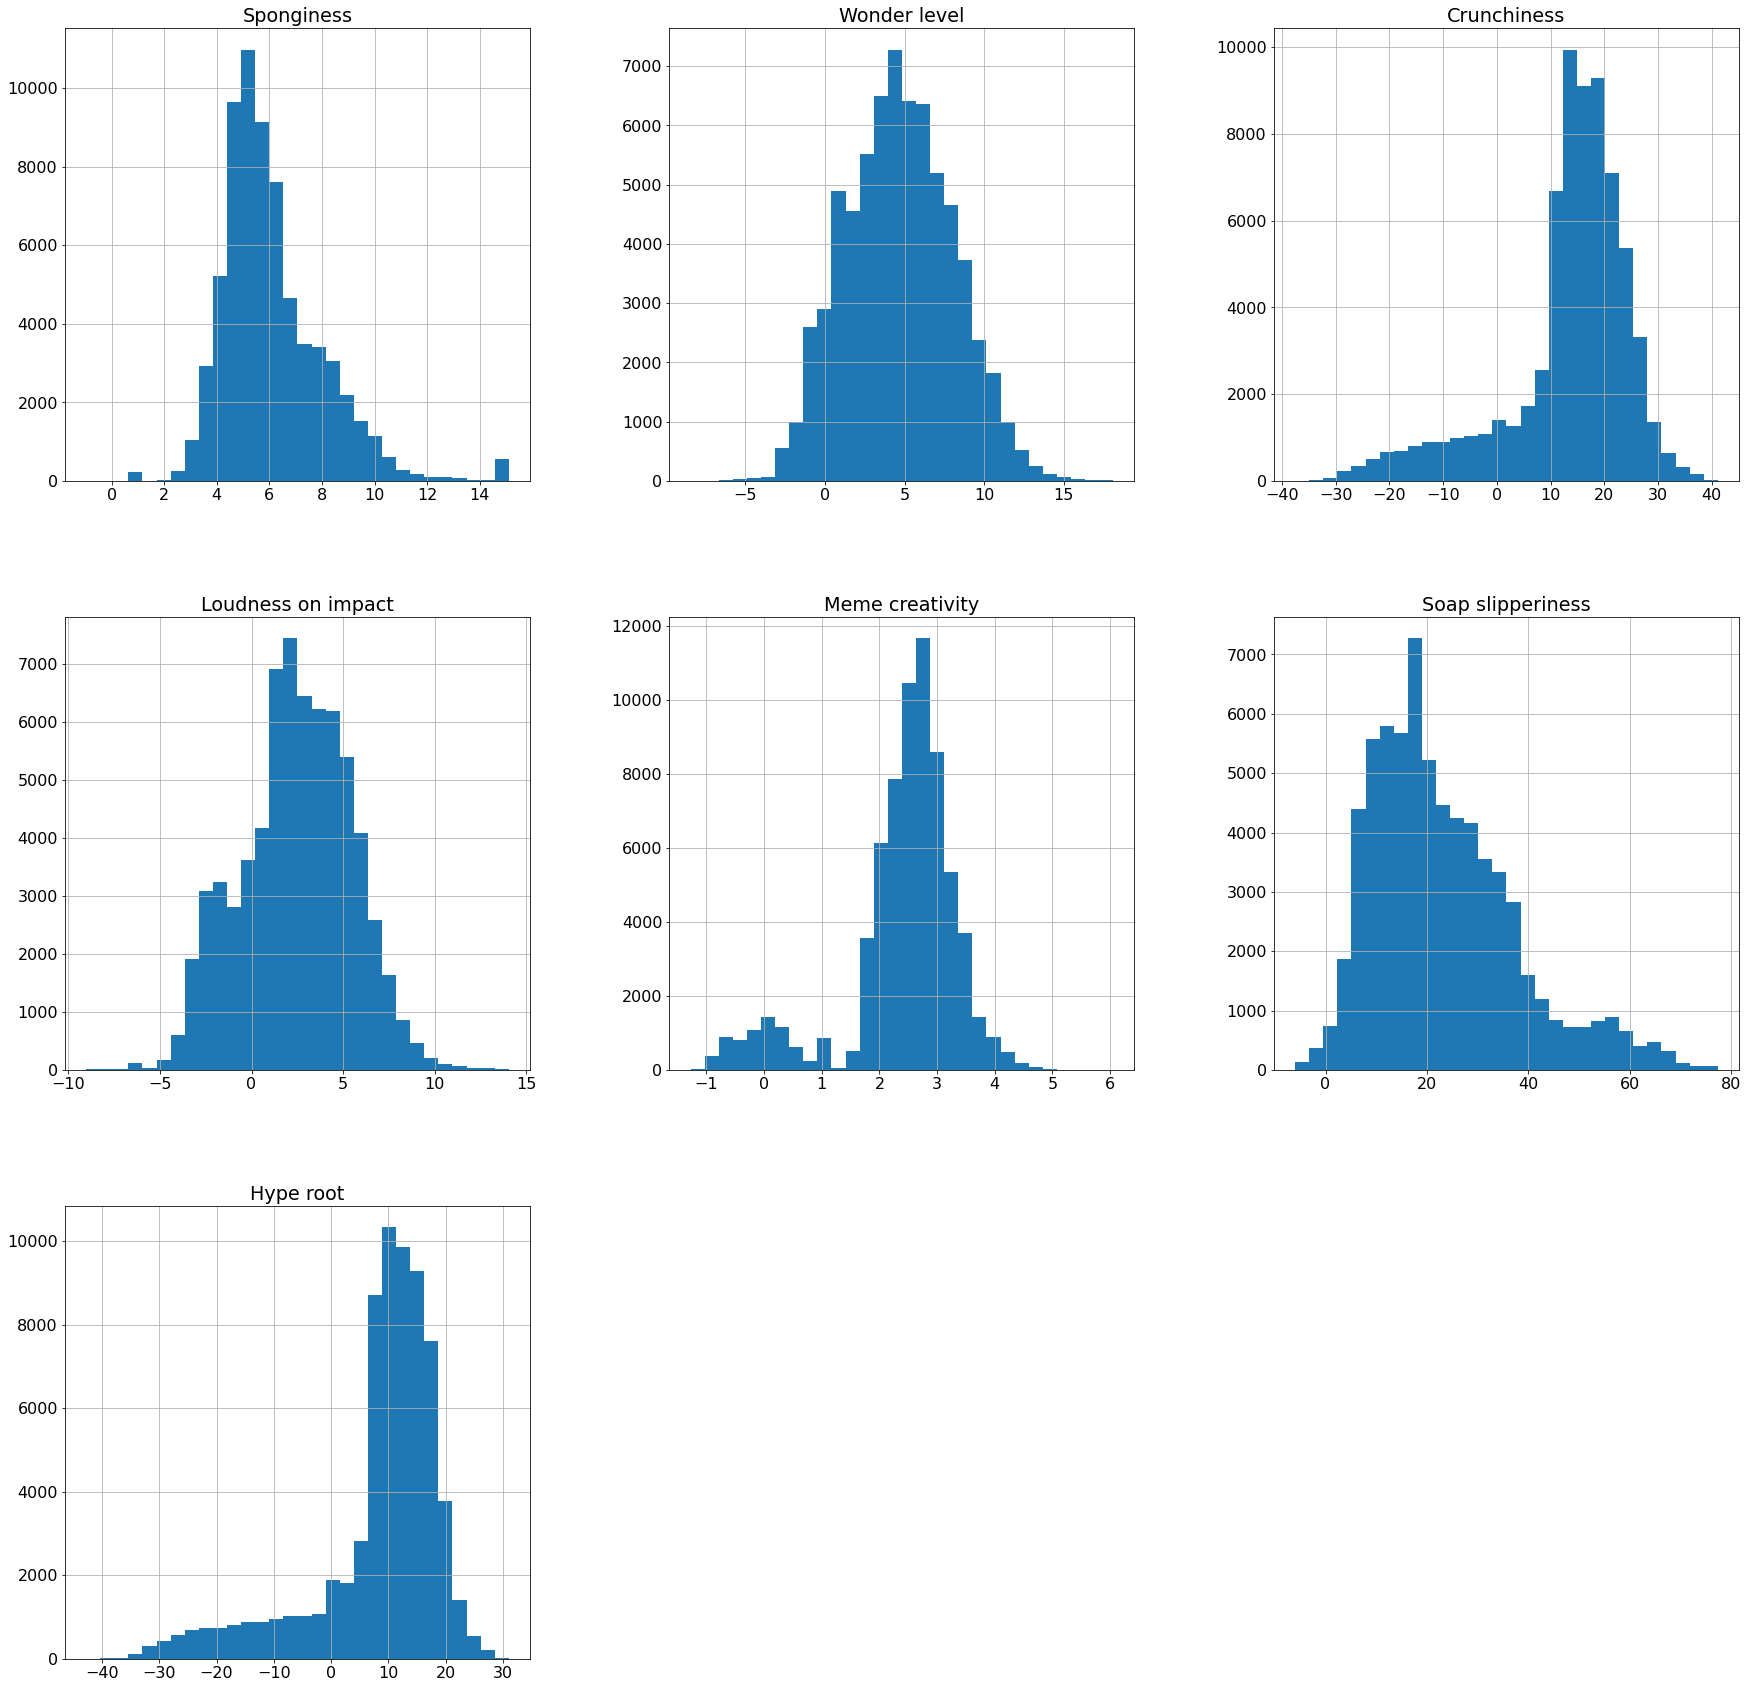

In [9]:
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(30, 30))
index = 0 
axs = axs.flatten() 
df.hist(column=['Sponginess', 'Wonder level', 'Crunchiness', 'Loudness on impact',
       'Meme creativity', 'Soap slipperiness', 'Hype root'],bins=30,ax=axs[index]);

In [10]:
df_1=df[0:1500]
df_2=df[1500:3000]
df_3=df[3000:4500]
df_4=df[4500:]

In [11]:
df_1.describe()

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,6.342811,7.613595,18.164238,4.128135,3.554001,50.328366,12.651530
std,1.339117,2.286360,4.249787,1.584316,0.629075,8.145240,3.695892
min,3.275860,1.889760,7.782760,0.292840,2.062400,28.209061,2.887420
25%,5.448800,5.780800,16.009720,2.887420,3.021880,46.892360,11.086160
50%,6.106160,7.671540,18.122899,4.125780,3.679240,51.331199,12.561900
75%,6.916240,9.449400,20.456860,5.365800,4.034480,55.768380,14.345985
max,11.365040,15.676059,33.577500,8.609440,6.056360,69.079922,25.066680


In [12]:
df_2.describe()

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,7.837448,5.599544,23.705197,2.244899,3.086196,63.855500,16.698658
std,2.205814,1.928931,6.598307,1.793455,0.412404,5.763501,5.148756
min,3.426920,0.332680,6.336900,-2.598880,2.062400,46.659961,1.117860
25%,5.955100,4.223720,18.790220,1.413340,2.821020,59.505039,13.093100
50%,7.927180,5.447140,23.459800,2.120500,3.073340,64.526542,16.336741
75%,9.241900,7.004220,28.018158,3.182900,3.325660,67.678879,19.582040
max,14.550580,12.563560,38.247080,7.960380,4.489320,77.371620,28.547699


In [13]:
df_3.describe()

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,7.660861,9.093164,22.999999,5.689481,3.100457,56.341934,16.196220
std,2.106537,2.509312,5.843598,2.201365,0.469541,4.058526,4.467499
min,3.831960,0.332680,4.779820,-2.481020,2.010940,38.484459,1.000000
25%,5.955100,7.893980,19.123880,4.774840,2.769560,53.314899,13.269060
50%,7.371080,9.449400,22.792480,6.072960,3.123140,56.118638,15.894350
75%,9.102045,10.672820,26.461080,7.075600,3.377120,59.036923,19.050839
max,13.742160,15.008740,39.915381,11.028060,4.539120,68.497259,27.427200


In [14]:
df_4.describe()

,Sponginess,Wonder level,Crunchiness,Loudness on impact,Meme creativity,Soap slipperiness,Hype root
count,64028.000000,64028.000000,64028.000000,64028.000000,64028.000000,64028.000000,64028.000000
mean,6.010729,4.502974,12.755154,2.338164,2.347982,20.876181,7.742765
std,1.907361,3.334650,11.779610,3.011851,0.991375,11.357671,11.447018
min,-0.972080,-8.450380,-37.581721,-9.028060,-1.275860,-6.006860,-42.769221
25%,4.741640,2.112200,10.227940,0.350940,2.062400,12.093780,6.013200
50%,5.601520,4.446160,15.119959,2.415980,2.567040,19.100640,10.556620
75%,6.864780,6.893000,20.124860,4.539120,2.920620,28.909580,15.098380
max,15.106680,18.122899,41.138801,14.035980,5.752580,66.862158,31.024420


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float64
 1   Wonder level        68528 non-null  float64
 2   Crunchiness         68528 non-null  float64
 3   Loudness on impact  68528 non-null  float64
 4   Meme creativity     68528 non-null  float64
 5   Soap slipperiness   68528 non-null  float64
 6   Hype root           68528 non-null  float64
dtypes: float64(7)
memory usage: 3.7 MB


In [16]:
# Change the features type to 'float32'
df = df.astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68528 entries, 0 to 68527
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sponginess          68528 non-null  float32
 1   Wonder level        68528 non-null  float32
 2   Crunchiness         68528 non-null  float32
 3   Loudness on impact  68528 non-null  float32
 4   Meme creativity     68528 non-null  float32
 5   Soap slipperiness   68528 non-null  float32
 6   Hype root           68528 non-null  float32
dtypes: float32(7)
memory usage: 1.8 MB


###Sequential Train-Test split and normalization

(60000, 7) (8528, 7)


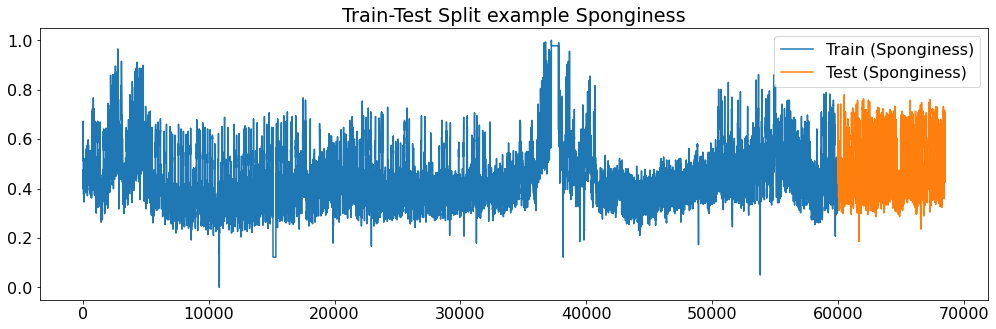

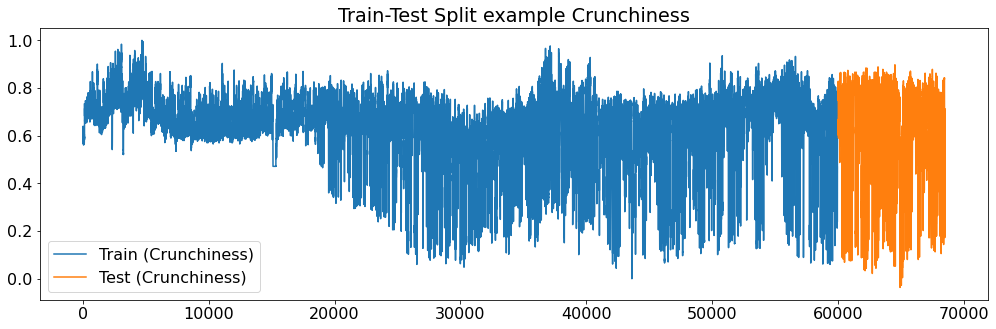

In [17]:
test_size = 8528
X_train_raw = df.iloc[:-test_size]
X_test_raw = df.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize the features 
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(17,5))
plt.plot(X_train_raw.Sponginess, label='Train (Sponginess)')
plt.plot(X_test_raw.Sponginess, label='Test (Sponginess)')
plt.title('Train-Test Split example Sponginess')
plt.legend()
plt.show()

plt.figure(figsize=(17,5))
plt.plot(X_train_raw.Crunchiness, label='Train (Crunchiness)')
plt.plot(X_test_raw.Crunchiness, label='Test (Crunchiness)')
plt.title('Train-Test Split example Crunchiness')
plt.legend()
plt.show()


### First Model

In [18]:
# Set the window size and stride
window = 200
stride = 10

In [19]:
future = df[-window:]
future = (future-X_min)/(X_max-X_min)
future = np.expand_dims(future, axis=0)
future.shape

(1, 200, 7)

In [20]:
def build_sequences(df, target_labels=['Sponginess'], window=200, stride=20, telescope=100):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.copy().values
    temp_label = df[target_labels].copy().values
    padding_len = len(df)%window

    if(padding_len != 0):
        # Compute padding length
        padding_len = window - len(df)%window
        padding = np.zeros((padding_len,temp_df.shape[1]), dtype='float64')
        temp_df = np.concatenate((padding,df))
        padding = np.zeros((padding_len,temp_label.shape[1]), dtype='float64')
        temp_label = np.concatenate((padding,temp_label))
        assert len(temp_df) % window == 0

    for idx in np.arange(0,len(temp_df)-window-telescope,stride):
        dataset.append(temp_df[idx:idx+window])
        labels.append(temp_label[idx+window:idx+window+telescope])

    dataset = np.array(dataset)
    labels = np.array(labels)
    return dataset, labels

In [21]:
# Set the size of the prediction window
target_labels = df.columns
telescope = 100

In [22]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window, stride, telescope)
X_test, y_test = build_sequences(X_test_raw, target_labels, window, stride, telescope)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5970, 200, 7), (5970, 100, 7), (830, 200, 7), (830, 100, 7))

In [23]:
# Define a TimeseriesGenerator
def inspect_multivariate(X, y, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

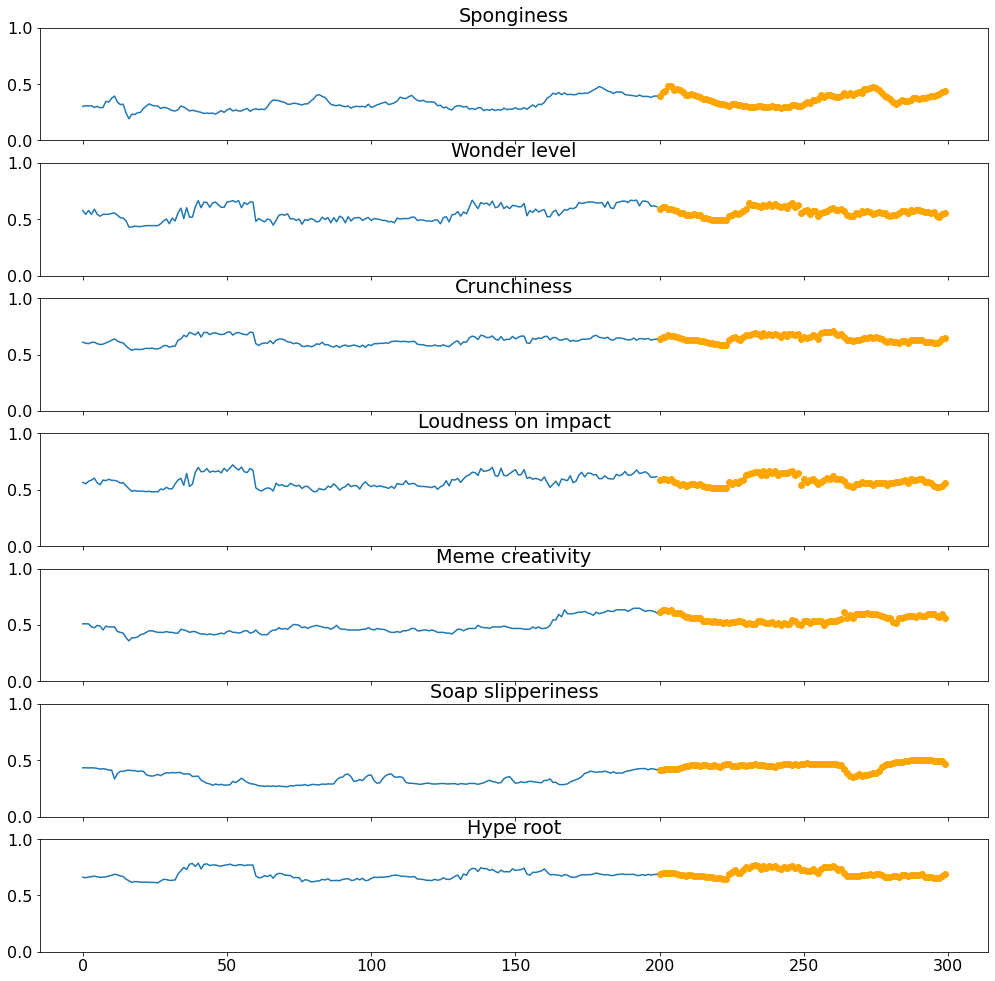

In [24]:
inspect_multivariate(X_train, y_train, target_labels, telescope)

In [25]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 64
epochs = 200

In [26]:
def build_CONV_LSTM_model(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    convlstm = tfkl.Bidirectional(tfkl.LSTM(64, return_sequences=True))(input_layer)
    convlstm = tfkl.Conv1D(128, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.MaxPool1D()(convlstm)

    convlstm = tfkl.Bidirectional(tfkl.LSTM(128, return_sequences=True))(convlstm)
    convlstm = tfkl.Conv1D(256, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.MaxPool1D()(convlstm)

    convlstm = tfkl.Bidirectional(tfkl.LSTM(256, return_sequences=True))(convlstm)
    convlstm = tfkl.Conv1D(512, 3, padding='same', activation='relu')(convlstm)
    convlstm = tfkl.GlobalAveragePooling1D()(convlstm)
    
    convlstm = tfkl.Dropout(.5)(convlstm)
    # In order to predict the next values for more than one channel,
    # we can use a Dense layer with a number given by telescope*num_channels,
    # followed by a Reshape layer to obtain a tensor of dimension 
    # [None, telescope, num_channels]

    dense = tfkl.Dense(output_shape[-1]*output_shape[-2], activation='relu')(convlstm)
    output_layer = tfkl.Reshape((output_shape[-2],output_shape[-1]))(dense)
    output_layer = tfkl.Conv1D(output_shape[-1], 1, padding='same')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics=['mae'])

    # Return the model
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 200, 7)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         36864     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 200, 128)          49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 100, 128)         0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 256)         263168    
 nal)                                                            
                                                             

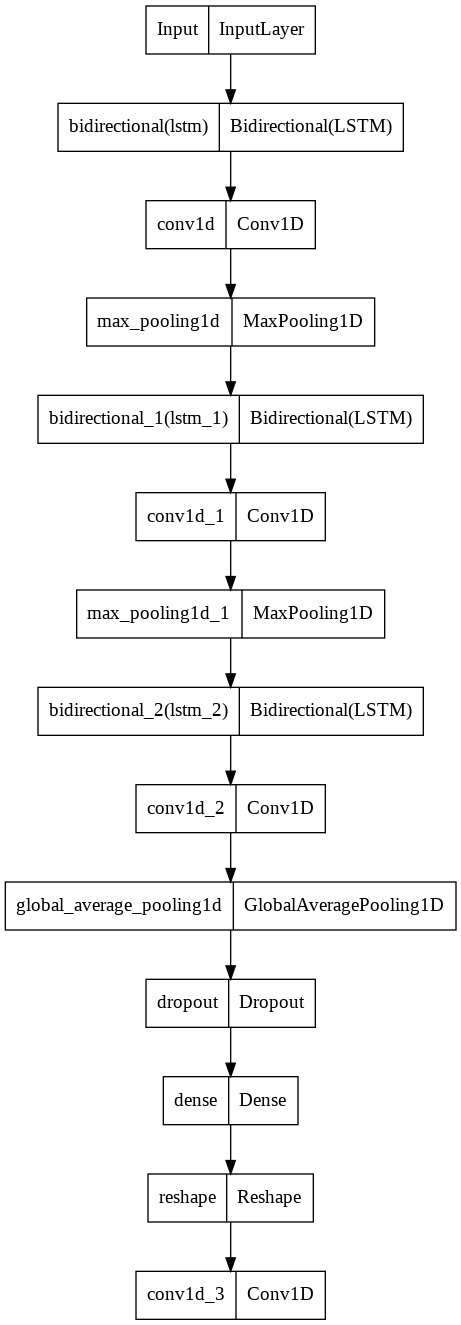

In [27]:
# Build the model
model_1 = build_CONV_LSTM_model(input_shape, output_shape)
model_1.summary()
tfk.utils.plot_model(model_1, expand_nested=True)

In [28]:
# Train the model
history_1 = model_1.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
84/84 [==============================] - 27s 94ms/step - loss: 0.2056 - mae: 0.3916 - val_loss: 0.1306 - val_mae: 0.2781 - lr: 0.0010
Epoch 2/200
84/84 [==============================] - 5s 59ms/step - loss: 0.0741 - mae: 0.2086 - val_loss: 0.0381 - val_mae: 0.1429 - lr: 0.0010
Epoch 3/200
84/84 [==============================] - 5s 59ms/step - loss: 0.0236 - mae: 0.1175 - val_loss: 0.0166 - val_mae: 0.0898 - lr: 0.0010
Epoch 4/200
84/84 [==============================] - 5s 58ms/step - loss: 0.0164 - mae: 0.0961 - val_loss: 0.0148 - val_mae: 0.0838 - lr: 0.0010
Epoch 5/200
84/84 [==============================] - 5s 59ms/step - loss: 0.0153 - mae: 0.0927 - val_loss: 0.0143 - val_mae: 0.0821 - lr: 0.0010
Epoch 6/200
84/84 [==============================] - 5s 58ms/step - loss: 0.0149 - mae: 0.0912 - val_loss: 0.0136 - val_mae: 0.0800 - lr: 0.0010
Epoch 7/200
84/84 [==============================] - 5s 59ms/step - loss: 0.0146 - mae: 0.0899 - val_loss: 0.0134 - val_mae: 0.07

In [29]:
model_1.save('MultivariateForecasting_1')

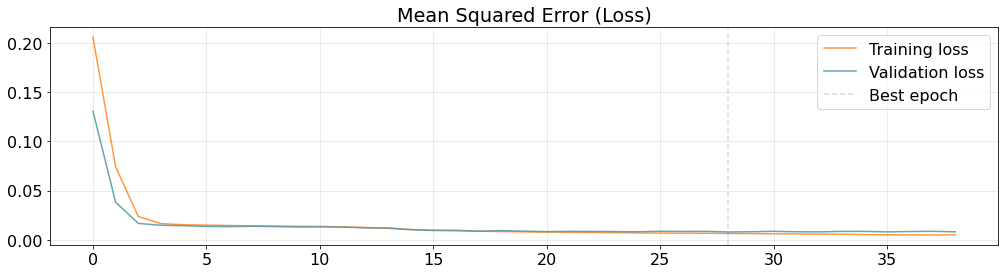

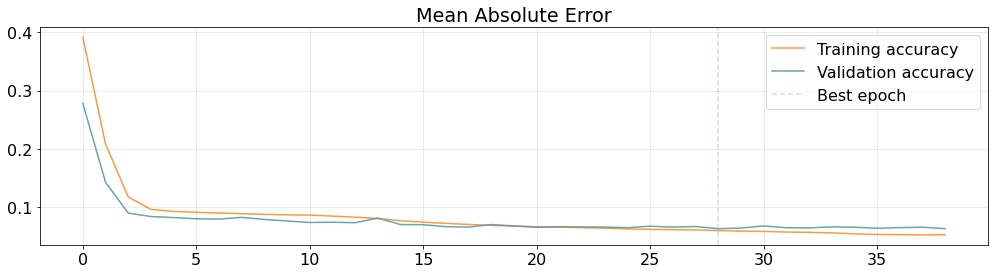

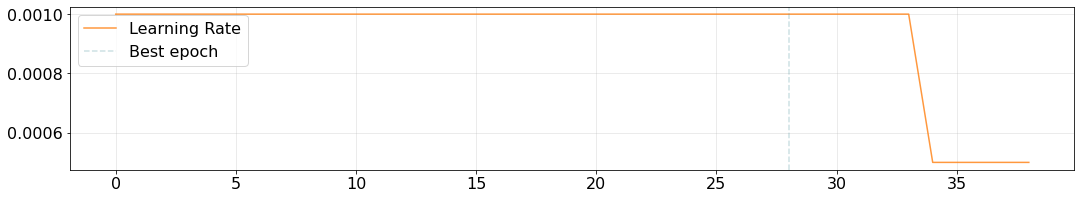

In [30]:
best_epoch = np.argmin(history_1['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history_1['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history_1['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history_1['mae'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history_1['val_mae'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history_1['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [31]:
# Predict the test set 
predictions_1 = model_1.predict(X_test)
print(predictions_1.shape)

mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions_1.flatten())
mean_absolute_error = tfk.metrics.mae(y_test.flatten(),predictions_1.flatten())
mean_squared_error, mean_absolute_error

(830, 100, 7)


(<tf.Tensor: shape=(), dtype=float32, numpy=0.010336074>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.0710866>)

In [32]:
def inspect_multivariate_prediction(X, y, pred, columns, telescope, idx=None):
    if(idx==None):
        idx=np.random.randint(0,len(X))

    figs, axs = plt.subplots(len(columns), 1, sharex=True, figsize=(17,17))
    for i, col in enumerate(columns):
        axs[i].plot(np.arange(len(X[0,:,i])), X[idx,:,i])
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), y[idx,:,i], color='orange')
        axs[i].scatter(np.arange(len(X[0,:,i]), len(X_train[0,:,i])+telescope), pred[idx,:,i], color='green')
        axs[i].set_title(col)
        axs[i].set_ylim(0,1)
    plt.show()

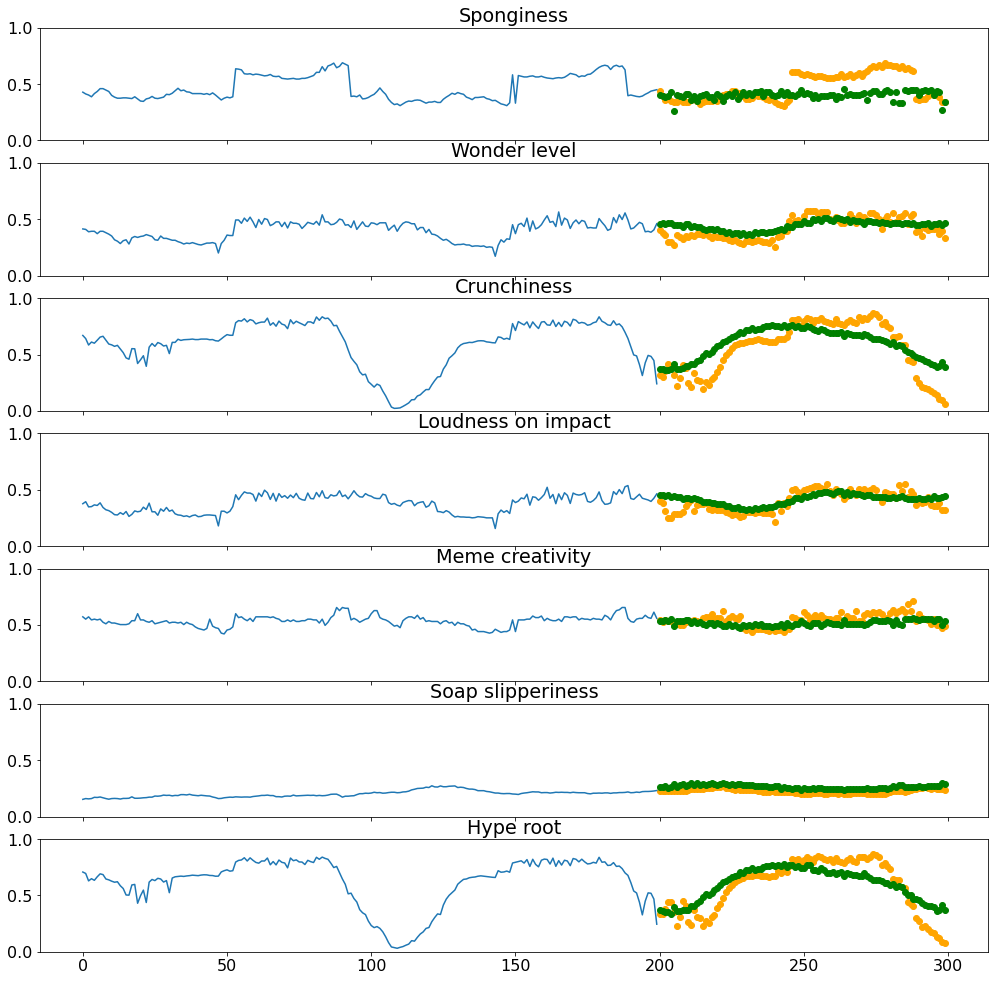

In [33]:
inspect_multivariate_prediction(X_test, y_test, predictions_1, target_labels, telescope)

In [34]:
# Predict the future 
maes = []
for i in range(predictions_1.shape[1]):
    ft_maes = []
    for j in range(predictions_1.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions_1[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [35]:
future_predictions = model_1.predict(future)

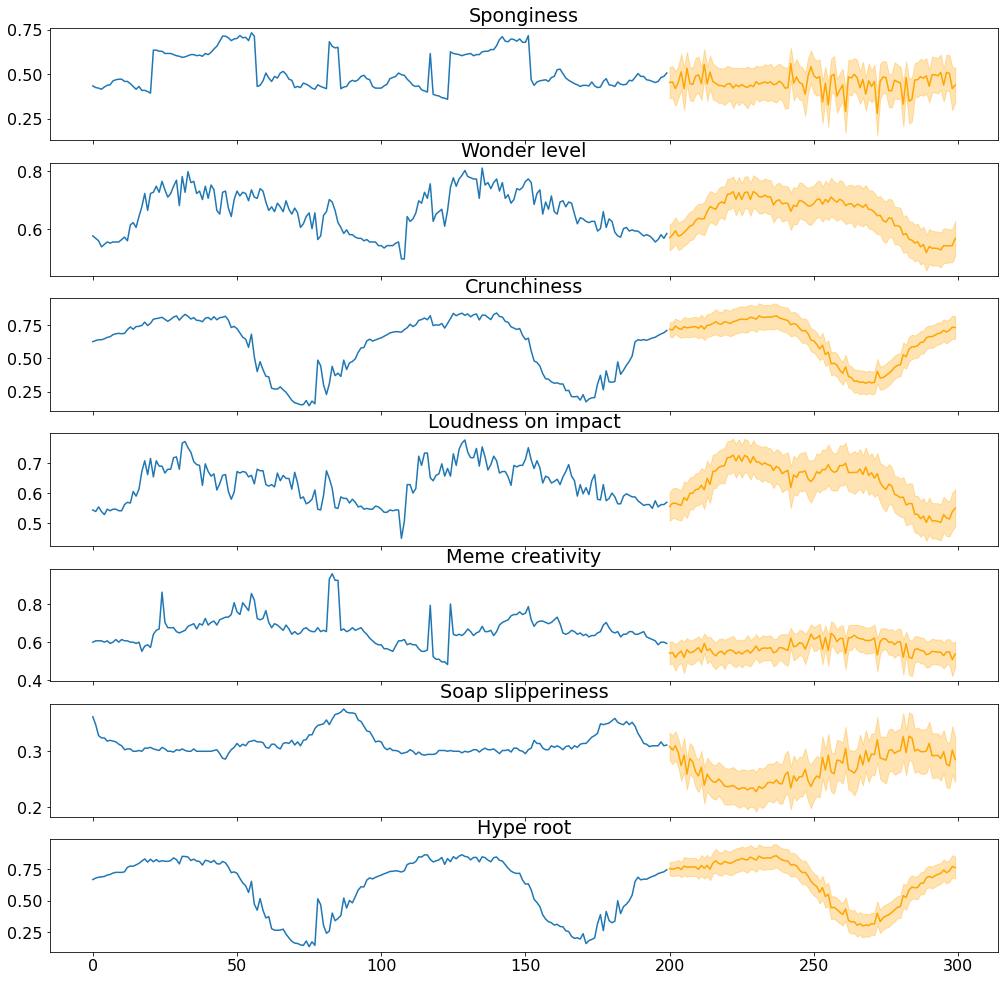

In [36]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()

### Second Model

In [37]:
# Set the window size, stride and telescope
window_2 = 400
stride_2 = 10
telescope_2 = 100

In [38]:
future = df[-window_2:]
future = (future-X_min)/(X_max-X_min)
future = np.expand_dims(future, axis=0)
future.shape

(1, 400, 7)

In [39]:
X_train, y_train = build_sequences(X_train_raw, target_labels, window_2, stride_2, telescope_2)
X_test, y_test = build_sequences(X_test_raw, target_labels, window_2, stride_2, telescope_2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5950, 400, 7), (5950, 100, 7), (830, 400, 7), (830, 100, 7))

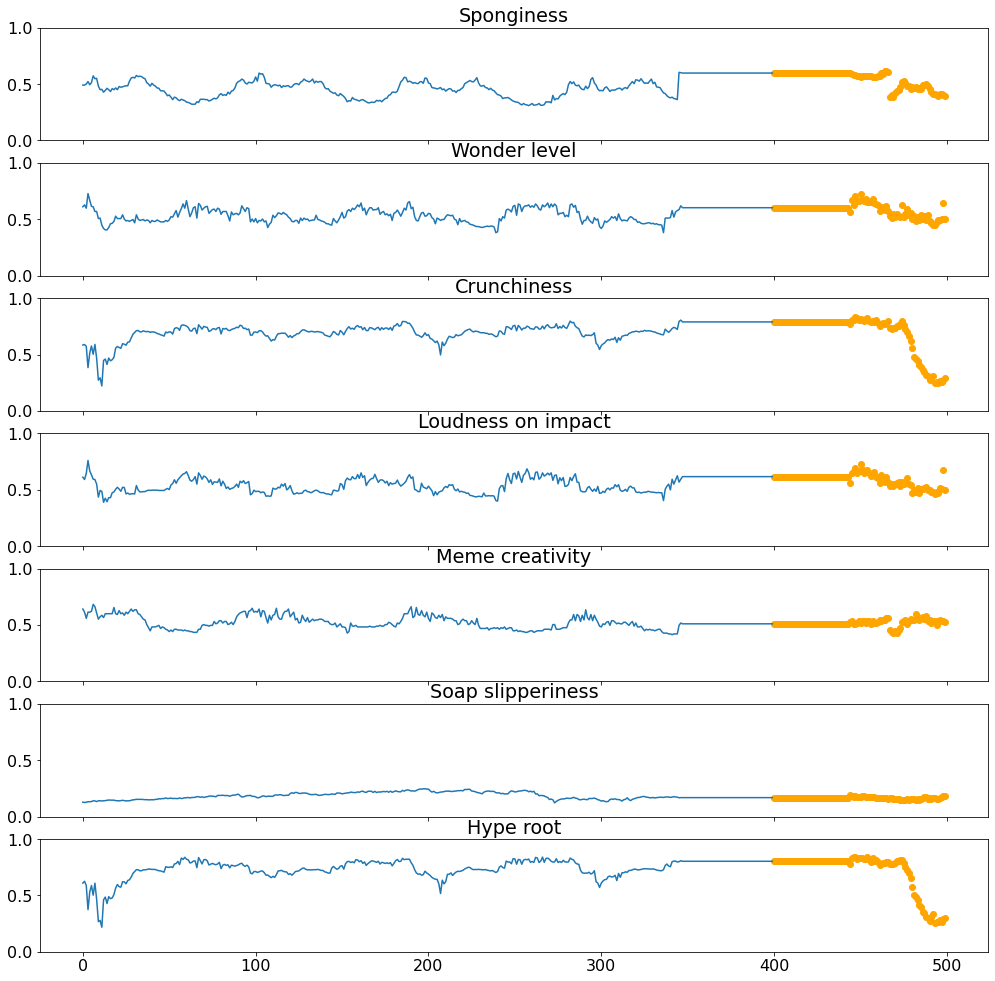

In [40]:
inspect_multivariate(X_train, y_train, target_labels, telescope_2)

In [41]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 64
epochs = 200

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 400, 7)]          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 400, 128)         36864     
 nal)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 400, 128)          49280     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 200, 128)         0         
 1D)                                                             
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 256)         263168    
 nal)                                                            
                                                             

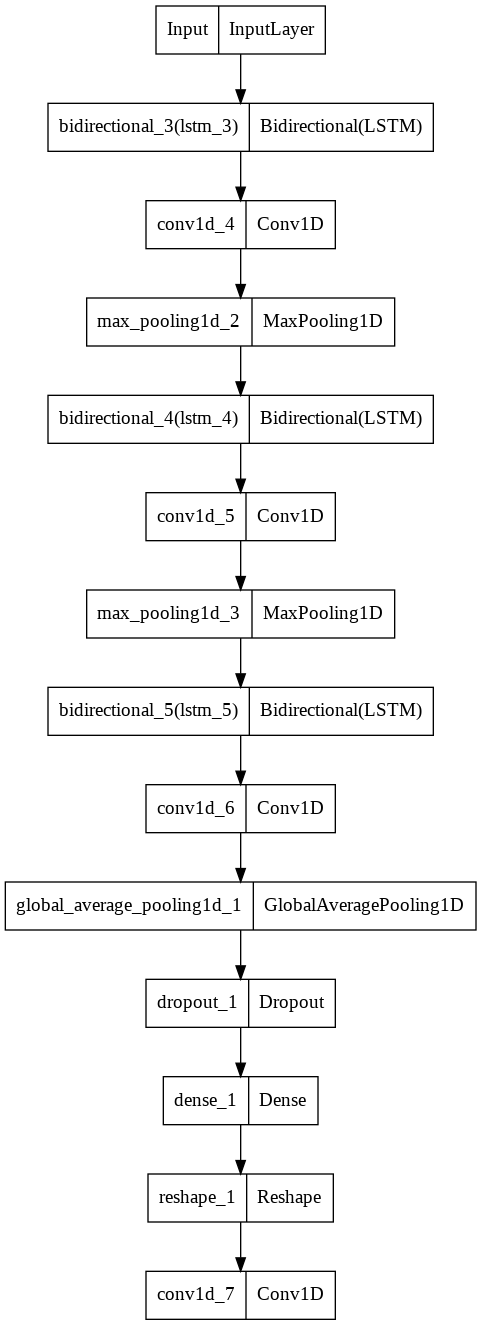

In [42]:
# Build the model
model_2 = build_CONV_LSTM_model(input_shape, output_shape)
model_2.summary()
tfk.utils.plot_model(model_2, expand_nested=True)

In [43]:
# Train the model
history_2 = model_2.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
84/84 [==============================] - 23s 139ms/step - loss: 0.0886 - mae: 0.2273 - val_loss: 0.0186 - val_mae: 0.1060 - lr: 0.0010
Epoch 2/200
84/84 [==============================] - 9s 107ms/step - loss: 0.0217 - mae: 0.1143 - val_loss: 0.0208 - val_mae: 0.1082 - lr: 0.0010
Epoch 3/200
84/84 [==============================] - 9s 108ms/step - loss: 0.0198 - mae: 0.1089 - val_loss: 0.0202 - val_mae: 0.1036 - lr: 0.0010
Epoch 4/200
84/84 [==============================] - 9s 107ms/step - loss: 0.0186 - mae: 0.1048 - val_loss: 0.0200 - val_mae: 0.1037 - lr: 0.0010
Epoch 5/200
84/84 [==============================] - 9s 107ms/step - loss: 0.0185 - mae: 0.1046 - val_loss: 0.0206 - val_mae: 0.1024 - lr: 0.0010
Epoch 6/200
84/84 [==============================] - 9s 107ms/step - loss: 0.0179 - mae: 0.1027 - val_loss: 0.0203 - val_mae: 0.1024 - lr: 0.0010
Epoch 7/200
84/84 [==============================] - 9s 107ms/step - loss: 0.0177 - mae: 0.1019 - val_loss: 0.0199 - val_ma

In [44]:
model_2.save('MultivariateForecasting_2')

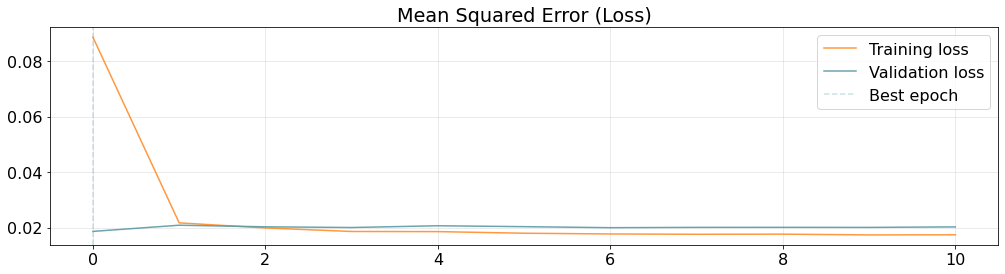

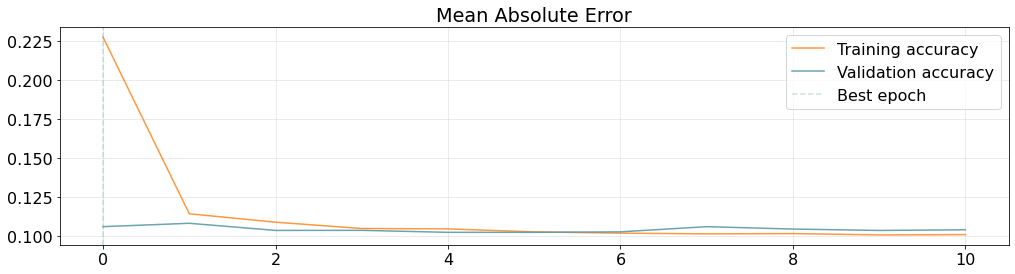

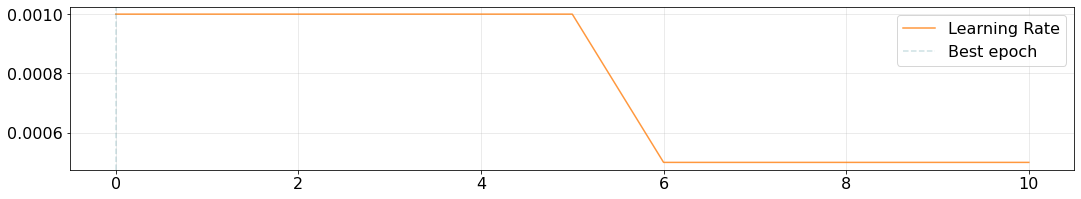

In [45]:
best_epoch = np.argmin(history_2['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history_2['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history_2['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history_2['mae'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history_2['val_mae'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Absolute Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history_2['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [46]:
# Predict the test set 
predictions_2 = model_2.predict(X_test)
print(predictions_2.shape)

mean_squared_error = tfk.metrics.mse(y_test.flatten(),predictions_2.flatten())
mean_absolute_error = tfk.metrics.mae(y_test.flatten(),predictions_2.flatten())
mean_squared_error, mean_absolute_error

(830, 100, 7)


(<tf.Tensor: shape=(), dtype=float32, numpy=0.022144174>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.11245396>)

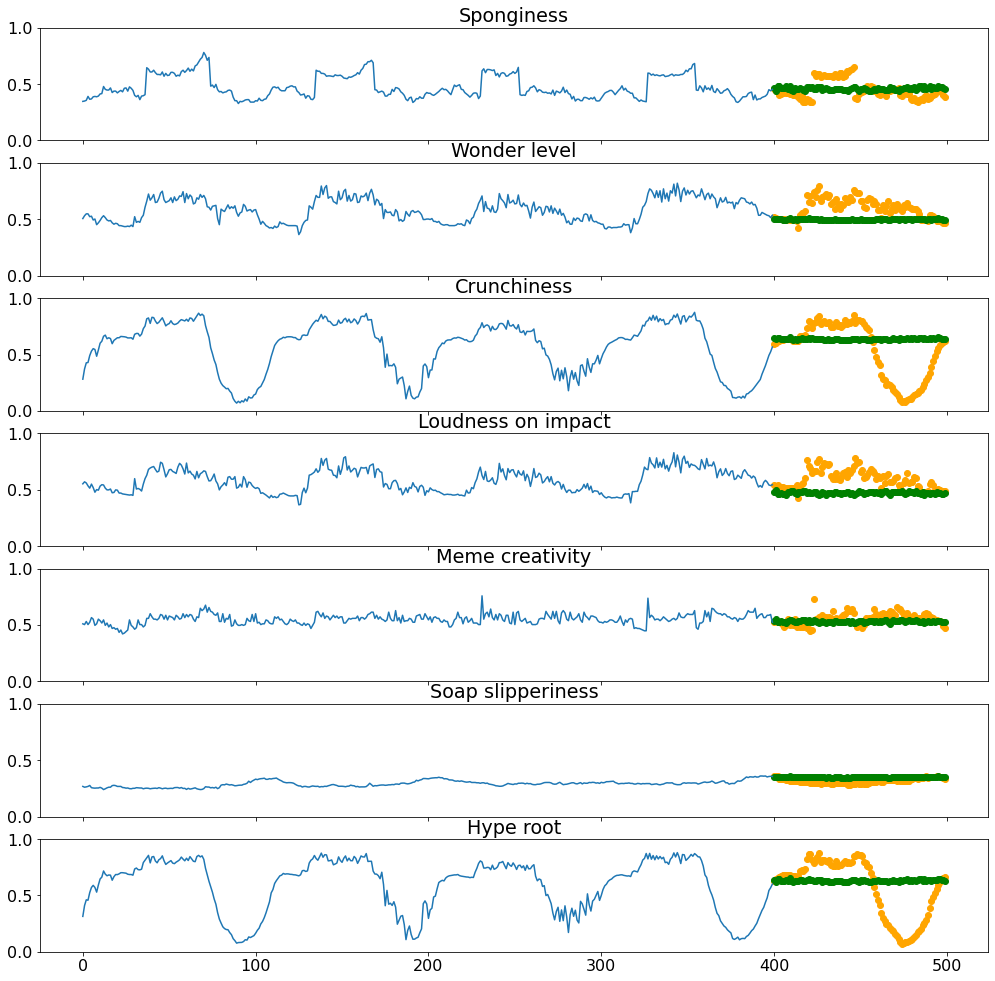

In [47]:
inspect_multivariate_prediction(X_test, y_test, predictions_2, target_labels, telescope_2)

In [48]:
# Predict the future 
maes = []
for i in range(predictions_2.shape[1]):
    ft_maes = []
    for j in range(predictions_2.shape[2]):
        ft_maes.append(np.mean(np.abs(y_test[:,i,j]-predictions_2[:,i,j]), axis=0))
    ft_maes = np.array(ft_maes)
    maes.append(ft_maes)
maes = np.array(maes)

In [49]:
future_predictions = model_2.predict(future)

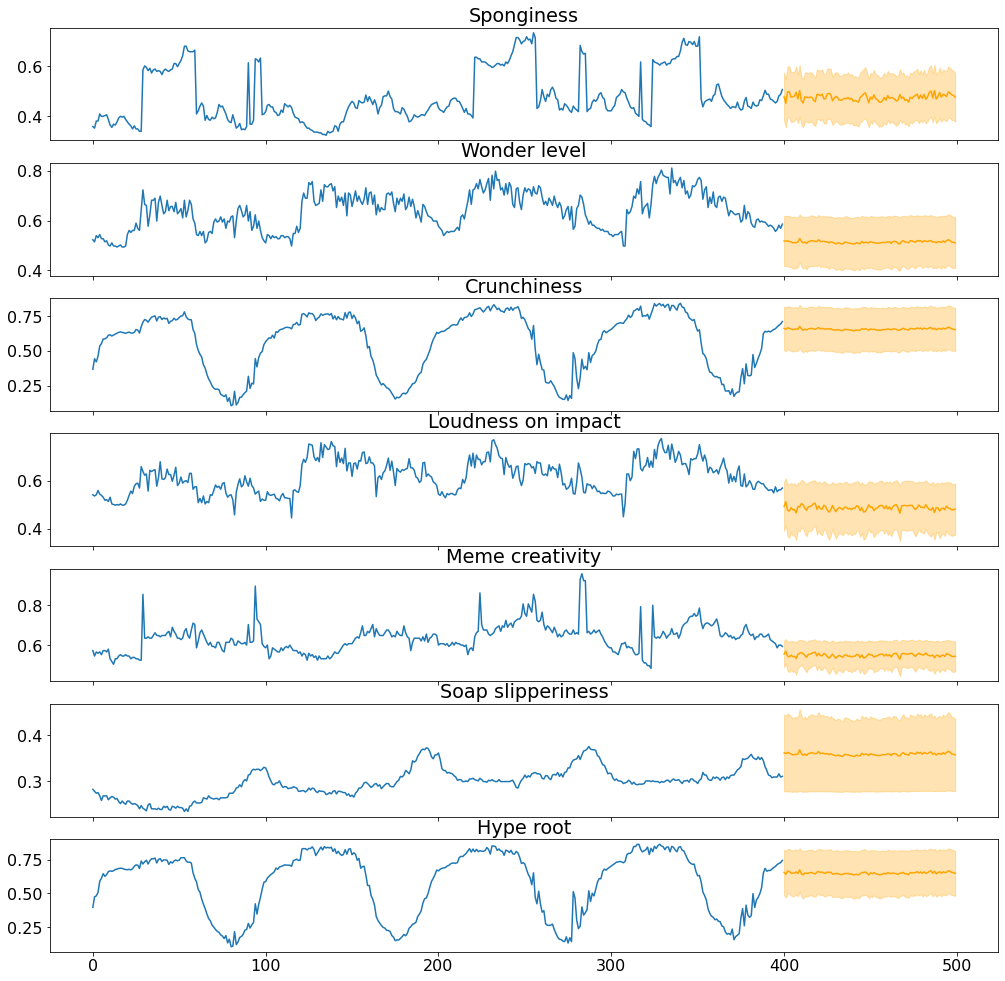

In [50]:
figs, axs = plt.subplots(len(target_labels), 1, sharex=True, figsize=(17,17))
for i, col in enumerate(target_labels):
    axs[i].plot(np.arange(len(future[0,:,i])), future[0,:,i])
    axs[i].plot(np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope_2), future_predictions[0,:,i], color='orange')
    axs[i].fill_between(
        np.arange(len(future[0,:,i]), len(future[0,:,i])+telescope), 
        future_predictions[0,:,i]+maes[:,i], 
        future_predictions[0,:,i]-maes[:,i], 
        color='orange', alpha=.3)
    axs[i].set_title(col)
    # axs[i].set_ylim(0,1)
plt.show()